<a href="https://colab.research.google.com/github/gtaiyeet/ML-assginment/blob/main/SVM_algorithms_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = ('/content/drive/MyDrive/Python /customer_loyalty_data.csv')

In [16]:
df = pd.read_csv(path)
print(df.info(),'\n')
print(df.head(),'\n')
print(df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Income                   1000 non-null   int64 
 2   Num_Purchases            1000 non-null   int64 
 3   Average_Rating           1000 non-null   int64 
 4   Customer_Service_Rating  1000 non-null   int64 
 5   Membership_Duration      1000 non-null   int64 
 6   Loyalty                  1000 non-null   object
dtypes: int64(6), object(1)
memory usage: 54.8+ KB
None 

   Age  Income  Num_Purchases  Average_Rating  Customer_Service_Rating  \
0   63    4528              1               1                        2   
1   20    2482             14               1                        5   
2   46    1316              1               4                        4   
3   52    3024              4               4                   

In [17]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as snr
from sklearn.preprocessing import RobustScaler

In [32]:
x = df.drop(['Loyalty'], axis=1)
y= df['Loyalty']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [26]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
classifer = svm.SVC()

In [28]:
hyperparameters = { 'kernel': ['linear'],
                   'C': [0.01, 0.1],
                   'gamma':[0.01, 0.1]} 

In [29]:
grid_search = GridSearchCV(classifer, hyperparameters, cv=5)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1], 'gamma': [0.01, 0.1],
                         'kernel': ['linear']})

In [35]:
best_classifier = grid_search.best_estimator_
print(best_classifier, '\n')
y_pred =best_classifier.predict(x_test_scaled)

SVC(C=0.01, gamma=0.01, kernel='linear') 



In [36]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0 104]
 [  0  96]]
              precision    recall  f1-score   support

       Loyal       0.00      0.00      0.00       104
   Non-Loyal       0.48      1.00      0.65        96

    accuracy                           0.48       200
   macro avg       0.24      0.50      0.32       200
weighted avg       0.23      0.48      0.31       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

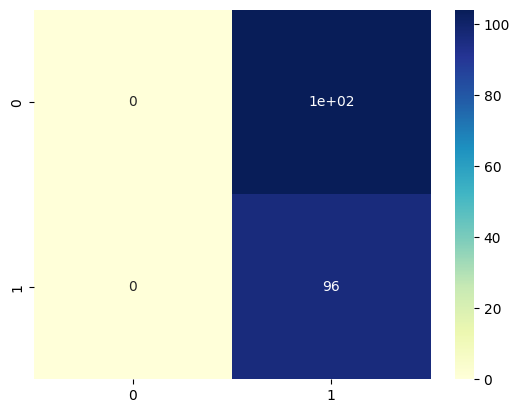

In [37]:
snr.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap="YlGnBu")

Age                        0.000135
Income                    -0.000117
Num_Purchases              0.000071
Average_Rating            -0.000100
Customer_Service_Rating   -0.000139
Membership_Duration        0.000011
dtype: float64 

Age                        0.000135
Income                     0.000117
Num_Purchases              0.000071
Average_Rating             0.000100
Customer_Service_Rating    0.000139
Membership_Duration        0.000011
dtype: float64 



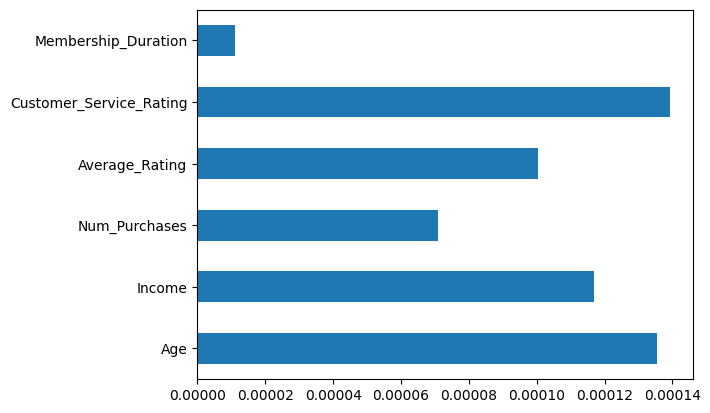

In [38]:
import matplotlib.pyplot as plt
importances = pd.Series(best_classifier.coef_[0], index=x_train.columns)
print(importances,'\n')
importances=abs(importances)
print(importances,'\n')
importances.plot(kind='barh')
plt.show()